<a href="https://colab.research.google.com/github/B97/Time-Series-Challenge/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
import datetime
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [5]:
#quick check
df.head(10)

,Unnamed: 0,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
1,1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2,2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
3,3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
4,4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84
5,5,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84
6,6,2022-02-08,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,10.0,14.0,20.71
7,7,2022-02-08,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,10.0,14.0,20.71
8,8,2022-02-08,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,9.89
9,9,2022-02-08,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,9.89


In [6]:
# drop a useless column
df = df.drop(columns=['Unnamed: 0'])


In [7]:
# revenue has many missing values. A quick check showed that those should be set to 0, since they match exactly the 0 value in sales_quantity (Which makes sense from a business persepctive!)
df.loc[df['sales_quantity'] == 0, 'revenue'] = 0

In [8]:
#checking the types of each columns
df.dtypes

day                        object
item_number                 int64
item_name                  object
purchase_price            float64
suggested_retail_price    float64
orders_quantity           float64
sales_quantity            float64
revenue                   float64
dtype: object

In [9]:
df.describe()

,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
count,1.878000e+03,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,8.014925e+07,1.216796,1.941402,8.602769,8.235357,10.457082
std,1.227237e+05,0.568129,0.936656,14.981958,11.510945,14.023269
min,8.002835e+07,0.520000,0.660000,0.000000,0.000000,0.000000
25%,8.002835e+07,0.674928,1.055314,0.000000,0.000000,0.000000
50%,8.010192e+07,0.978451,1.546338,0.000000,0.000000,0.000000
75%,8.031748e+07,1.991321,3.216415,18.000000,15.000000,18.965000
max,8.031748e+07,2.150000,3.490000,144.000000,85.000000,93.520000


In [10]:
# Each row is duplicated twice. Hence, adding unecessary information. Let's drop duplicates (based on all column values)
df = df.drop_duplicates()

In [11]:
# size of the df
df.shape

(939, 8)

In [12]:
# let's see how many disctinct items we have
df.item_number.value_counts()

80317483    313
80101923    313
80028349    313
Name: item_number, dtype: int64

In [13]:
#Let's focus on only one item: 80317483

In [14]:
df1 = df[df['item_number'] == 80317483]

In [15]:
# converting the day column to date type, and set the df index to date.
df1['day'] = pd.to_datetime(df['day'])
df1.index = df1.day
df1 = df1.drop(columns = ['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df1.head(100)

,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
day,,,,,,,
2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
2022-02-08,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,10.0,14.0,20.71
2022-02-07,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,10.0,8.0,11.74
2022-02-06,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0,0.00
2022-02-05,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,20.0,18.0,26.82
...,...,...,...,...,...,...,...
2021-11-06,80317483,ROMA TOMATEN ES I 500G SF,1.050000,1.590000,30.0,28.0,44.52
2021-11-05,80317483,ROMA TOMATEN ES I 500G SF,1.050000,1.590000,0.0,2.0,3.18
2021-11-04,80317483,ROMA TOMATEN ES I 500G SF,1.050000,1.590000,0.0,7.0,11.13


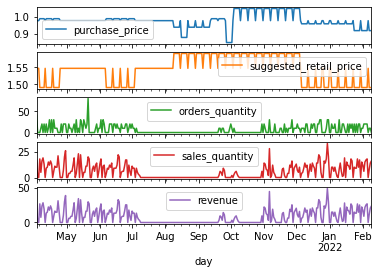

In [17]:
# some plot to visualize the different quantities
df1 = df1[df1['item_number'] == 80317483]
plot_cols = ['purchase_price', 'suggested_retail_price', 'orders_quantity','sales_quantity','revenue']
plot_features = df1[plot_cols]
_ = plot_features.plot(subplots=True)


In [18]:
# let's drop non useful features (item_number and item_name are not useful, and have same value everywhere)
df1 = df1.drop(columns = ['item_number','item_name'])
cols = df1.columns
train = df1[:int(0.7*(len(df1)))]
valid = df1[int(0.7*(len(df1))):]

In [19]:
train

,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
day,,,,,
2022-02-09,0.920000,1.490000,0.0,16.0,23.55
2022-02-08,0.920000,1.490000,10.0,14.0,20.71
2022-02-07,0.920000,1.490000,10.0,8.0,11.74
2022-02-06,0.978451,1.546338,0.0,0.0,0.00
2022-02-05,0.920000,1.490000,20.0,18.0,26.82
...,...,...,...,...,...
2021-07-10,0.978451,1.546338,0.0,0.0,0.00
2021-07-09,0.978451,1.546338,0.0,0.0,0.00
2021-07-08,0.978451,1.546338,0.0,2.0,2.98


In [20]:
from statsmodels.tsa.vector_ar.var_model import VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
model = VAR(endog=train)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


In [22]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [23]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,5):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for purchase_price is :  0.006520798848126618
rmse value for suggested_retail_price is :  0.04237225687614159
rmse value for orders_quantity is :  14.243380586020805
rmse value for sales_quantity is :  8.32913037249744
rmse value for revenue is :  12.312118605516003
